# STUDENT NAME, STUDENT NUMBER (TO BE FILLED BY THE STUDENT)

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 11-November-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I 

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class means whether a patient has breast cancer or not. The two categories are: malignant and benign.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).


In [156]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "breastcancer.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Question 1 (5 points out of 20)

Project the thirty-dimensional Breast Cancer data to two-dimensional principal components. Use PCA and tSNE approaches. For each approach plot the result and then compare them.


Additionally help: 
For this dataset, it is important to normalize the input features but this topic was not discuss in class. 

To do so, before applying the fit_transform function run this piece of code: 

features = StandardScaler().fit_transform(features). (replace features by the name of your variable)

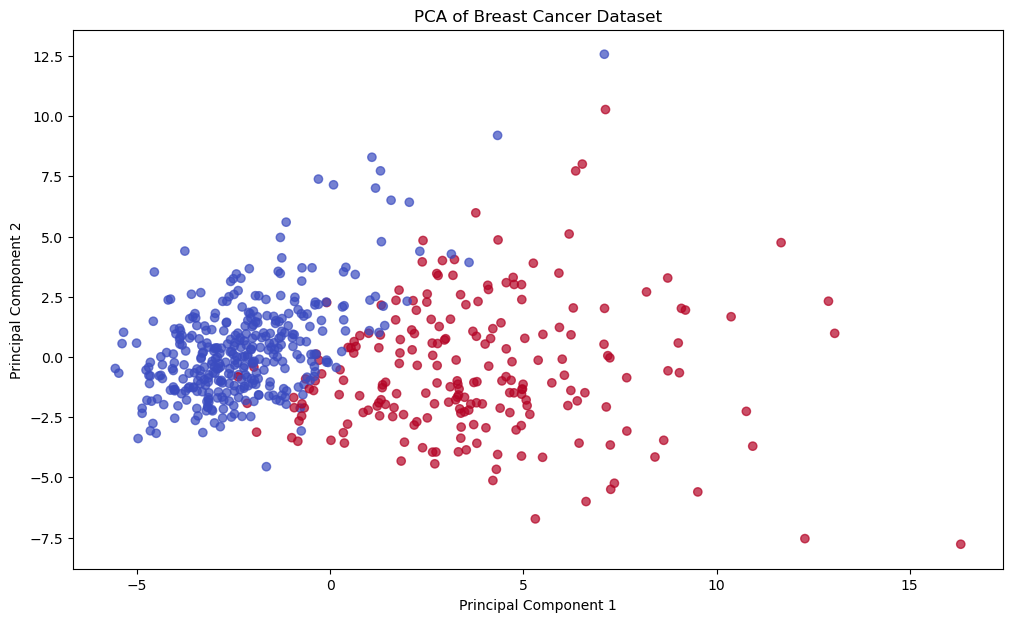

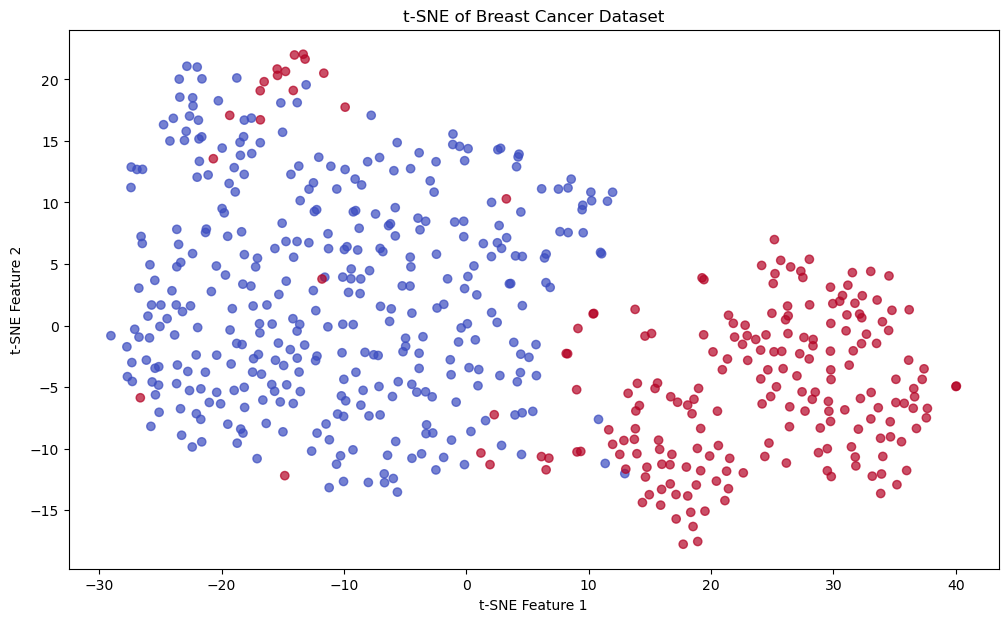

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

dataDF = dataDF.drop('id', axis=1)
dataDF['diagnosis'] = dataDF['diagnosis'].map({'M': 1, 'B': 0})
target = dataDF['diagnosis']

features = dataDF.2drop('diagnosis', axis=1)
features_normalized = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_normalized)

plt.figure(figsize=(12, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='coolwarm', alpha=0.7)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_normalized)

plt.figure(figsize=(12, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE of Breast Cancer Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


## Question 2 ( 1 points out of 20)

What can you tell about the two types of tumors? Are they easily differentiated by the features computed from a digitized image? Why?

The PCA plot shows that there is a noticeable separation between two clusters of data points which is visible thanks to the adoption of separate colours for each type of tumor. 

The t-SNE plot shows a more pronounced separation between clusters, indicating that t-SNE is capturing the non-linear structures in the data quite well. t-SNE reduces dimensionality while preserving the small pairwise distances or local similarities, which often makes it better at creating distinct clusters for visualization purposes compared to PCA, which is a linear method.

However, It's accurate to conclude that while there are promising signs of class separability, the observed overlap in PCA and to a lesser extent in t-SNE warrants further investigation, possibly through advanced classification algorithms and additional feature engineering.


# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [132]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [133]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248
5,5,361
6,6,719
7,7,817
8,8,1018
9,9,1093


## Question 1 (6 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

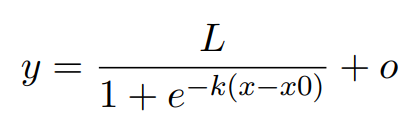

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


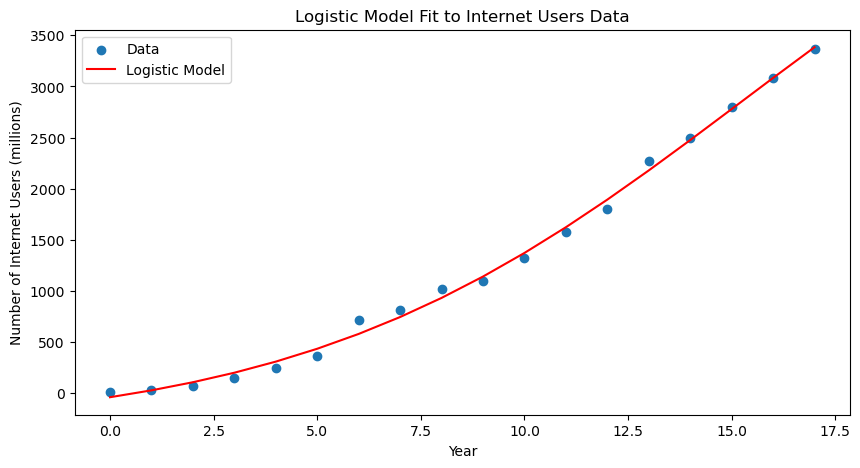

Best-fit Parameters:
x0 (Inflection Point): 15.221422172564012
L (Carrying Capacity): 6462.425976998267
k (Growth Rate): 0.18871075837543108
Offset (Baseline Adjustment): -384.7497254096639


In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def logistic(x, x0, L, k):
    return L / (1 + np.exp(-k * (x - x0)))

def log_cost(params, x, y):
    x0, L, k, offset = params
    pred = logistic(x, x0, L, k) + offset
    return np.mean((pred - y) ** 2)

st_params = [10, 1000, 0.1, -300]

x = dataset_df['year']
y = dataset_df['n_users']

# Fit the model
res = minimize(log_cost, st_params, args=(x, y))
x0, L, k, offset = res.x  

pred = logistic(x, x0, L, k) + offset

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, pred, label='Logistic Model', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Internet Users (millions)')
plt.legend()
plt.title('Logistic Model Fit to Internet Users Data')
plt.show()

print("Best-fit Parameters:")
print(f"x0 (Inflection Point): {x0}")
print(f"L (Carrying Capacity): {L}")
print(f"k (Growth Rate): {k}")
print(f"Offset (Baseline Adjustment): {offset}")


**Comment:**
- L (vertical scaling parameter): This parameter represents the horizontal asymptote
- x0 (Inflection Point): The point where the function shifts from concave to convex.
- k (Growth Rate): The k value determines the steepness of the curve. It is the 'horizontal' scaling parameter, which affects the rate of exponential 
  growth. 
- Offset (Vertical Shift): This parameter is a vertical shift that moves the entire curve up or down on the graph defining the function starting point.

## Question 2 (3 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

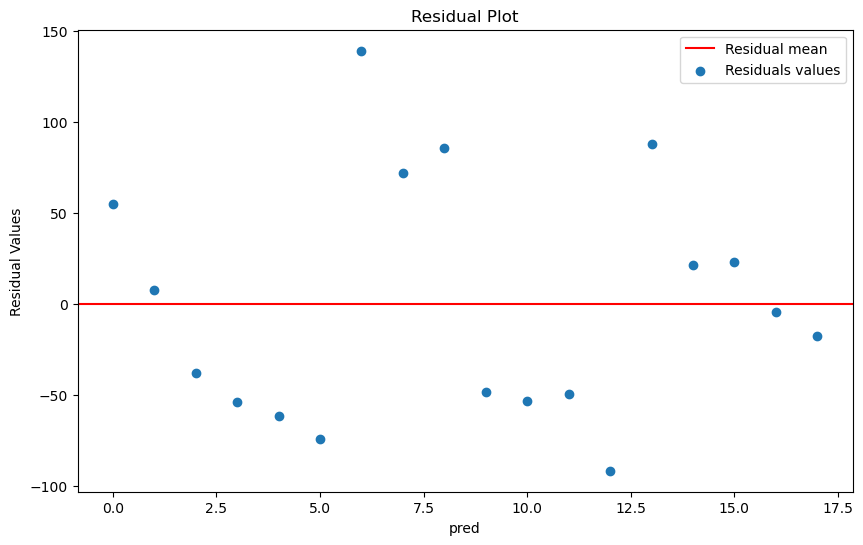

In [137]:
#TODO
residuals = dataset_df.iloc[:,1] - pred

plt.figure(figsize=(10, 6))
plt.axhline(y=0, color="r", linestyle="-", label="Residual mean")
plt.scatter(dataset_df.iloc[:,0], residuals, label="Residuals values")
plt.xlabel('pred')
plt.ylabel('Residual Values')
plt.legend()
plt.title('Residual Plot')
plt.show()



Residuals are ideally symmetrically dispersed around zero, indicating normal distribution, and should predominantly gather near the center of the plot. However, due to an insufficient number of data points, it is challenging to definitively ascertain the suitability of the model.

## Question 3 (5 points out of 20)

Display the 95% interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

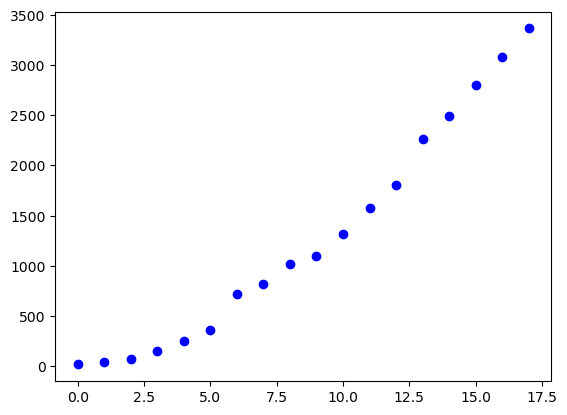

In [229]:
params = []
plt.scatter(x, y, color='blue')
replicas = 100

df_unc = pd.DataFrame(x)

i = 0;
for _ in range(replicas):
    rep_data = dataset_df.copy()
    rep_data.iloc[:,1] = pred + residual * np.random.normal(size=dataset_df.shape[0])

    x_data = rep_data.iloc[:,0]
    y_data = rep_data.iloc[:,1]

    res = minimize(log_cost, st_params, args=(x_data, y_data))
    params.append(res.x)
    x0, L, k, offset = res.x
    pred_replica = logistic(x_data, x0, L, k) + offset

    df_unc = pd.concat([df_unc, pd.DataFrame(pred_replica)], axis=1)
    i += 1

/var/folders/26/7sr8s37n6nb5g99wv7xjv12r0000gn/T/ipykernel_49344/3078857816.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unc['median'] = df_unc.quantile(0.5, axis=1, interpolation='midpoint')
/var/folders/26/7sr8s37n6nb5g99wv7xjv12r0000gn/T/ipykernel_49344/3078857816.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unc['p2.5'] = df_unc.quantile(0.025, axis=1, interpolation='midpoint')
/var/folders/26/7sr8s37n6nb5g99wv7xjv12r0000gn/T/ipykernel_49344/3078857816.py:7: PerformanceWarning: DataFrame is highly fragment

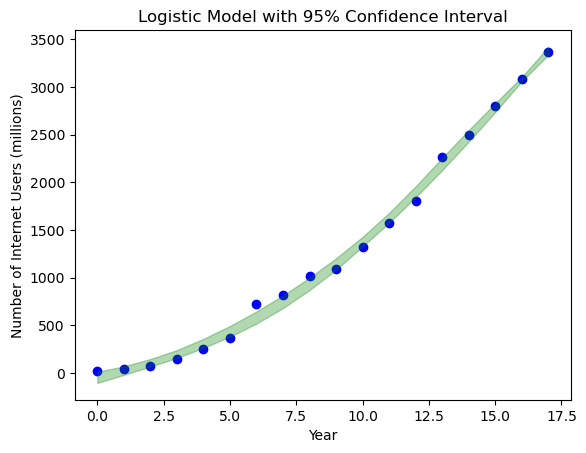

In [230]:
df_unc = df_unc.iloc[:, 1:replicas+1] 
plt.scatter(dataset_df.iloc[:,0], dataset_df.iloc[:,1], color='blue') 

df_unc['p2.5'] = df_unc.quantile(0.025, axis=1, interpolation='midpoint')
df_unc['p975'] = df_unc.quantile(0.975, axis=1, interpolation='midpoint')

plt.fill_between(dataset_df.iloc[:,0], df_unc['p2.5'], df_unc['p975'], color='green', alpha=0.3)

plt.xlabel('Year')  
plt.ylabel('Number of Internet Users (millions)') 
plt.title('Logistic Model with 95% Confidence Interval')
plt.show()


In [231]:
params_df = pd.DataFrame(params)
params_df.rename(columns={0: "x0", 1: "L", 2: "k", 3: "offset"},  inplace = True)
params_df.head()

,x0,L,k,offset
0,17.678554,8174.424673,0.167540,-446.823270
1,15.942824,6748.732518,0.185956,-318.663807
2,15.206706,6540.734836,0.189096,-424.976116
3,14.508711,6044.002751,0.192961,-376.217033
4,14.395257,5890.710470,0.205091,-331.133817


In [232]:
# Lower Bounds
params_df.quantile(0.025, interpolation = 'midpoint') 

x0          12.821717
L         4811.204983
k            0.128665
offset    -745.692148
Name: 0.025, dtype: float64

In [233]:
# Upper Bounds
params_df.quantile(0.975, interpolation = 'midpoint') 

x0           21.725832
L         11714.732931
k             0.251907
offset     -171.903420
Name: 0.975, dtype: float64